In [ ]:
from sklearn.datasets import load_digits
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sn
from sklearn.preprocessing import StandardScaler

In [ ]:
#Loading MNIST dataset into a datframe and putting the labels into another dataframe
(data, label) = load_digits(as_frame=True, return_X_y=True)

In [ ]:
#Since each image in the dataset was of 8*8 pixels, therefore after conversion into a dataframe, it has 64 features
print(data.shape)

(1797, 64)


In [ ]:
#The labels of each image
print(label.shape)

(1797,)


In [ ]:
print(data.head(5))

   pixel_0_0  pixel_0_1  pixel_0_2  pixel_0_3  pixel_0_4  pixel_0_5  \
0        0.0        0.0        5.0       13.0        9.0        1.0   
1        0.0        0.0        0.0       12.0       13.0        5.0   
2        0.0        0.0        0.0        4.0       15.0       12.0   
3        0.0        0.0        7.0       15.0       13.0        1.0   
4        0.0        0.0        0.0        1.0       11.0        0.0   

   pixel_0_6  pixel_0_7  pixel_1_0  pixel_1_1  ...  pixel_6_6  pixel_6_7  \
0        0.0        0.0        0.0        0.0  ...        0.0        0.0   
1        0.0        0.0        0.0        0.0  ...        0.0        0.0   
2        0.0        0.0        0.0        0.0  ...        5.0        0.0   
3        0.0        0.0        0.0        8.0  ...        9.0        0.0   
4        0.0        0.0        0.0        0.0  ...        0.0        0.0   

   pixel_7_0  pixel_7_1  pixel_7_2  pixel_7_3  pixel_7_4  pixel_7_5  \
0        0.0        0.0        6.0       13.0

<Figure size 640x480 with 0 Axes>

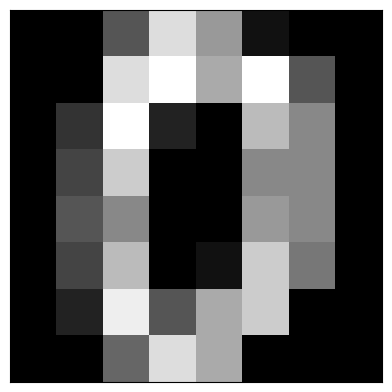

<Figure size 640x480 with 0 Axes>

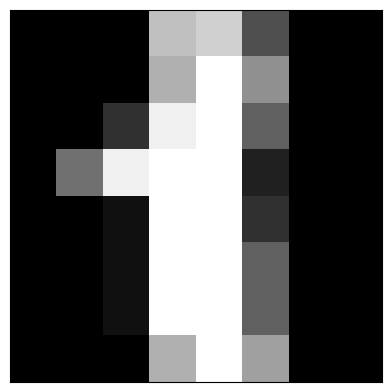

<Figure size 640x480 with 0 Axes>

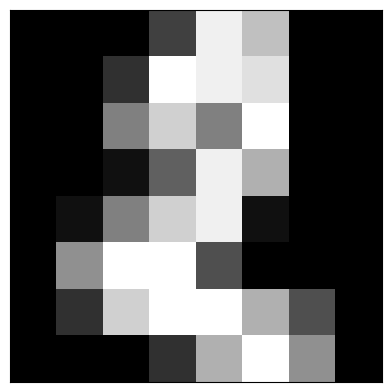

<Figure size 640x480 with 0 Axes>

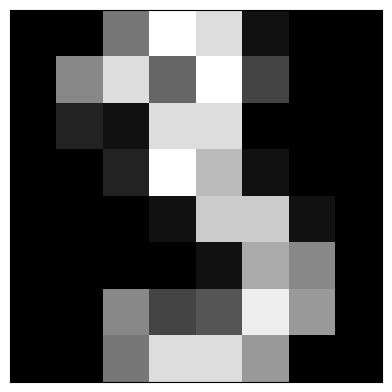

<Figure size 640x480 with 0 Axes>

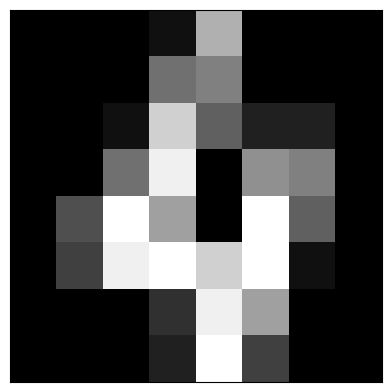

<Figure size 640x480 with 0 Axes>

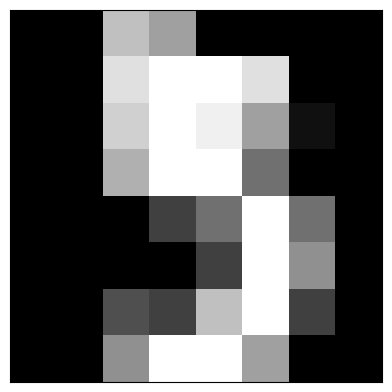

<Figure size 640x480 with 0 Axes>

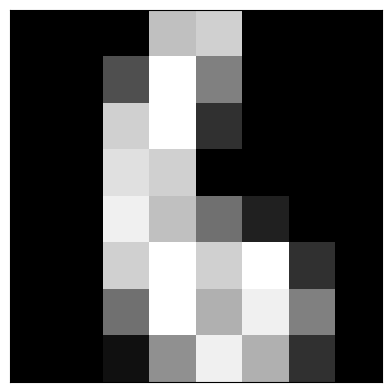

<Figure size 640x480 with 0 Axes>

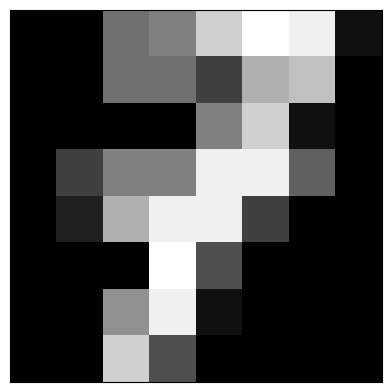

<Figure size 640x480 with 0 Axes>

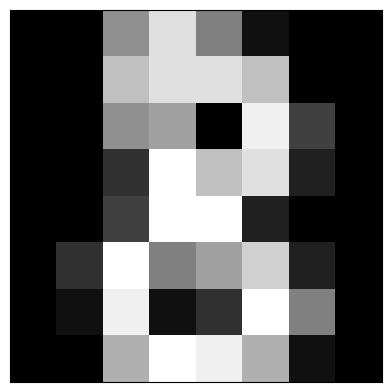

<Figure size 640x480 with 0 Axes>

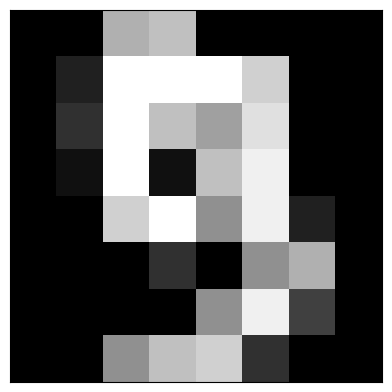

In [ ]:
dgts = load_digits()

for i in dgts.images[0:10]:
  plt.gray()
  plt.matshow(i)
  plt.tick_params(left = False, labelleft = False ,
                  labelbottom = False, bottom = False, top=False, labeltop=False)
  plt.show()

**PCA**

In [ ]:
from sklearn.decomposition import PCA

In [ ]:
#Standardizing the data i.e. subtracting the mean and dividing by Standard Deviation to get zero mean and unit variance using inbuilt functions
standardized_data = StandardScaler().fit_transform(data)
print(standardized_data.shape)

(1797, 64)


In [ ]:
#Reducing to 2 dimensions and computing covariance matrix and eigen vectors using inbuilt functions
pca = PCA(n_components=2)
pca_data = pca.fit_transform(standardized_data)

#Diemnsions of data reduced to a 2-D plane
print(pca_data.shape)

(1797, 2)


In [ ]:
#Attaching the label for each 2-D data point
pca_data = np.vstack((pca_data.T, label)).T

In [ ]:
#Creating a new dataframe which new Principal Component values
pca_df = pd.DataFrame(data=pca_data, columns=("PC1", "PC2", "label"))
print(pca_df.head())

        PC1       PC2  label
0  1.914214 -0.954499    0.0
1  0.588977  0.924618    1.0
2  1.302042 -0.317163    2.0
3 -3.020773 -0.868774    3.0
4  4.528948 -1.093465    4.0


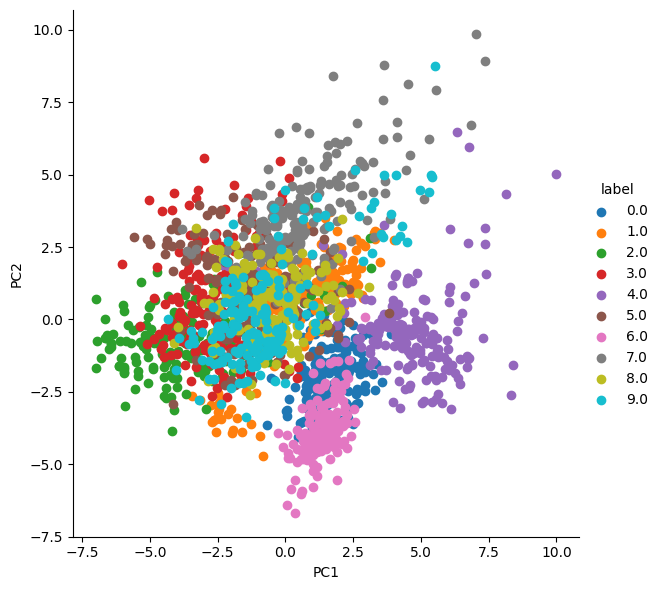

In [ ]:
#Visualizing PCA in 2-D space
sn.FacetGrid(pca_df, hue="label", height=6, aspect=1).map(plt.scatter, 'PC1', 'PC2').add_legend()
plt.show()

The variance achieved in 2-D is 30.039%


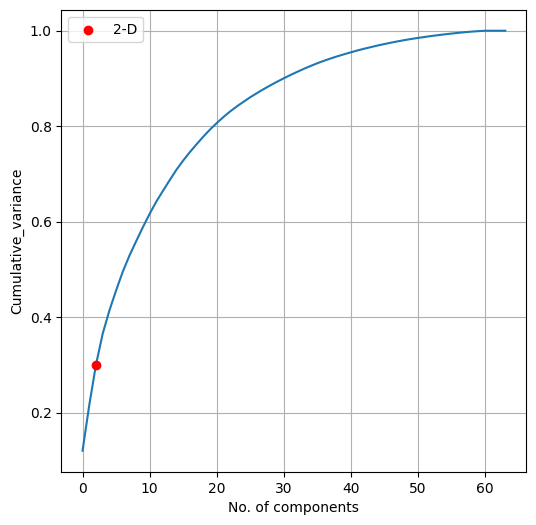

In [ ]:
#Plotting CDF to visualize variance achieved in 2-D

pca = PCA(n_components=64)
pca_data = pca.fit_transform(standardized_data)


percentage_var = pca.explained_variance_ / np.sum(pca.explained_variance_)

cumulative_var = np.cumsum(percentage_var)

plt.figure(1, figsize=(6, 6))

plt.plot(cumulative_var)
plt.grid()
plt.xlabel('No. of components')
plt.ylabel('Cumulative_variance')

highlight_index = 2
highlight_value = cumulative_var[highlight_index]
custom_label="2-D"
plt.scatter(highlight_index, highlight_value, color='red', label=custom_label, zorder=5)
plt.legend()

print(f'The variance achieved in 2-D is {format((highlight_value*100), ".3f")}%')

plt.show()


**t-SNE**

In [ ]:
from sklearn.manifold import TSNE

In [ ]:
tsne = TSNE(n_components=2, random_state=0)
tsne_data = tsne.fit_transform(standardized_data)

In [ ]:
#Attaching the labels
tsne_data = np.vstack((tsne_data.T, label)).T

In [ ]:
#Creating a new dataframe FOR t-SNE values
tsne_df = pd.DataFrame(data=tsne_data, columns=("Dim_1", "Dim_2", "label"))
print(tsne_df.head())

       Dim_1      Dim_2  label
0  38.978703 -31.390959    0.0
1  15.286879  -2.993164    1.0
2  -6.009504 -14.839417    2.0
3 -28.350510   2.584280    3.0
4  36.367405   2.485669    4.0


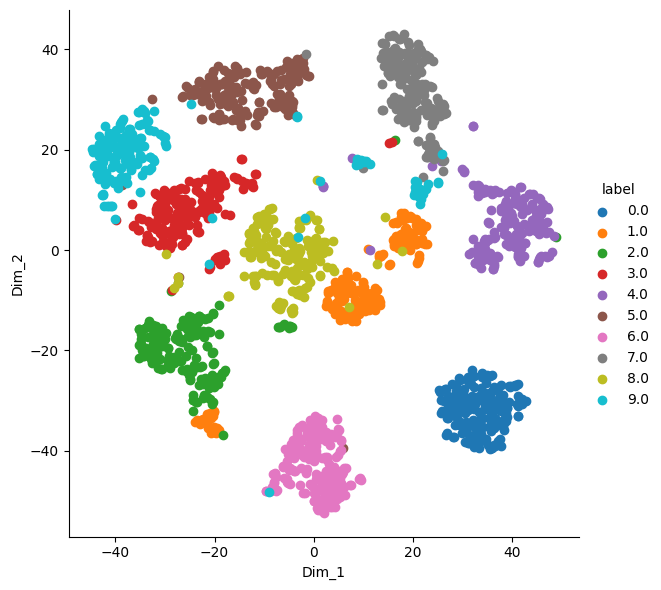

In [ ]:
#Visualizing t-SNE
sn.FacetGrid(tsne_df, hue="label", height=6, aspect=1).map(plt.scatter, 'Dim_1', 'Dim_2').add_legend()
plt.show()